<a href="https://colab.research.google.com/github/Mahal09/Python/blob/main/Hackathon_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Importing the libraries

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading the Training Data and using the Training Data to build the Model

In [4]:
train = pd.read_csv('/content/Train_dataset.csv')
df_train = train.copy()
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [5]:
## Checking for the null values
df_train.isnull().sum()


,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train['Facebook Popularity Quotient'].mean()

77.9387153800825

In [15]:
df_train['Instagram Popularity Quotient'].mean()

74.40468431771893

In [8]:
# Fill missing values in 'Facebook Popularity Quotient' with the mean
df_train['Facebook Popularity Quotient'].fillna(df_train['Facebook Popularity Quotient'].mean(), inplace=True)

# Fill missing values in 'Instagram Popularity Quotient' with the mean
df_train['Instagram Popularity Quotient'].fillna(df_train['Instagram Popularity Quotient'].mean(), inplace=True)


<ipython-input-8-6c68b8512bd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Facebook Popularity Quotient'].fillna(df_train['Facebook Popularity Quotient'].mean(), inplace=True)
<ipython-input-8-6c68b8512bd7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
##df_train["Instagram Popularity Quotient"] = df_train["Instagram Popularity Quotient"].fillna(
##    value=df_train.groupby(["Hygiene Rating", "Food Rating"])["Instagram Popularity Quotient"].transform("median")
##)
df_train["Value Deals Rating"] = df_train["Value Deals Rating"].fillna(
    value=df_train.groupby(["Service", "Value for Money"])["Value Deals Rating"].transform("median")
)

df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


In [10]:
# Fill missing values in 'Value Deals Rating' with the mean
df_train['Value Deals Rating'].fillna(df_train['Value Deals Rating'].mean(), inplace=True)

<ipython-input-10-0e6f6608c337>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Value Deals Rating'].fillna(df_train['Value Deals Rating'].mean(), inplace=True)


In [11]:
df_train["Overall Restaurant Rating"] = df_train["Overall Restaurant Rating"].fillna(
    value=df_train.groupby(["Hygiene Rating", "Food Rating"])["Overall Restaurant Rating"].transform("median")
)
df_train["Live Music Rating"] = df_train["Live Music Rating"].fillna(
    value=df_train.groupby(["Lively", "Open Sitting Available"])["Live Music Rating"].transform("median")
)

In [12]:
##df_train["Facebook Popularity Quotient"] = df_train["Facebook Popularity Quotient"].fillna(
##    value=df_train.groupby(["Hygiene Rating", "Food Rating"])["Facebook Popularity Quotient"].transform("median")
## )
df_train["Value Deals Rating"] = df_train["Value Deals Rating"].fillna(
    value=df_train.groupby(["Value for Money", "Staff Responsivness"])["Value Deals Rating"].transform("median")
)

In [13]:
df_train["Resturant Tier"] = df_train["Resturant Tier"].fillna(
    value=df_train.groupby(["Open Sitting Available", "Dedicated Parking"])["Resturant Tier"].transform("median")
)
df_train["Ambience"] = df_train["Ambience"].fillna(
    value=df_train.groupby(["Lively", "Service"])["Ambience"].transform("median")
)

In [14]:
df_train["Comedy Gigs Rating"] = df_train["Comedy Gigs Rating"].fillna(
    value=df_train.groupby(["Open Sitting Available", "Lively","Ambience"])["Comedy Gigs Rating"].transform("median")
)
df_train["Live Sports Rating"] = df_train["Live Sports Rating"].fillna(
    value=df_train.groupby(["Lively","Live Music Rating"])["Live Sports Rating"].transform("median")
)

In [15]:
df_train["Comedy Gigs Rating"] = df_train["Comedy Gigs Rating"].fillna(
    value=df_train.groupby(["Open Sitting Available", "Value for Money"])["Comedy Gigs Rating"].transform("median")
)
df_train["Live Sports Rating"] = df_train["Live Sports Rating"].fillna(
    value=df_train.groupby(["Value for Money","Live Music Rating"])["Live Sports Rating"].transform("median")
)

In [16]:
df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


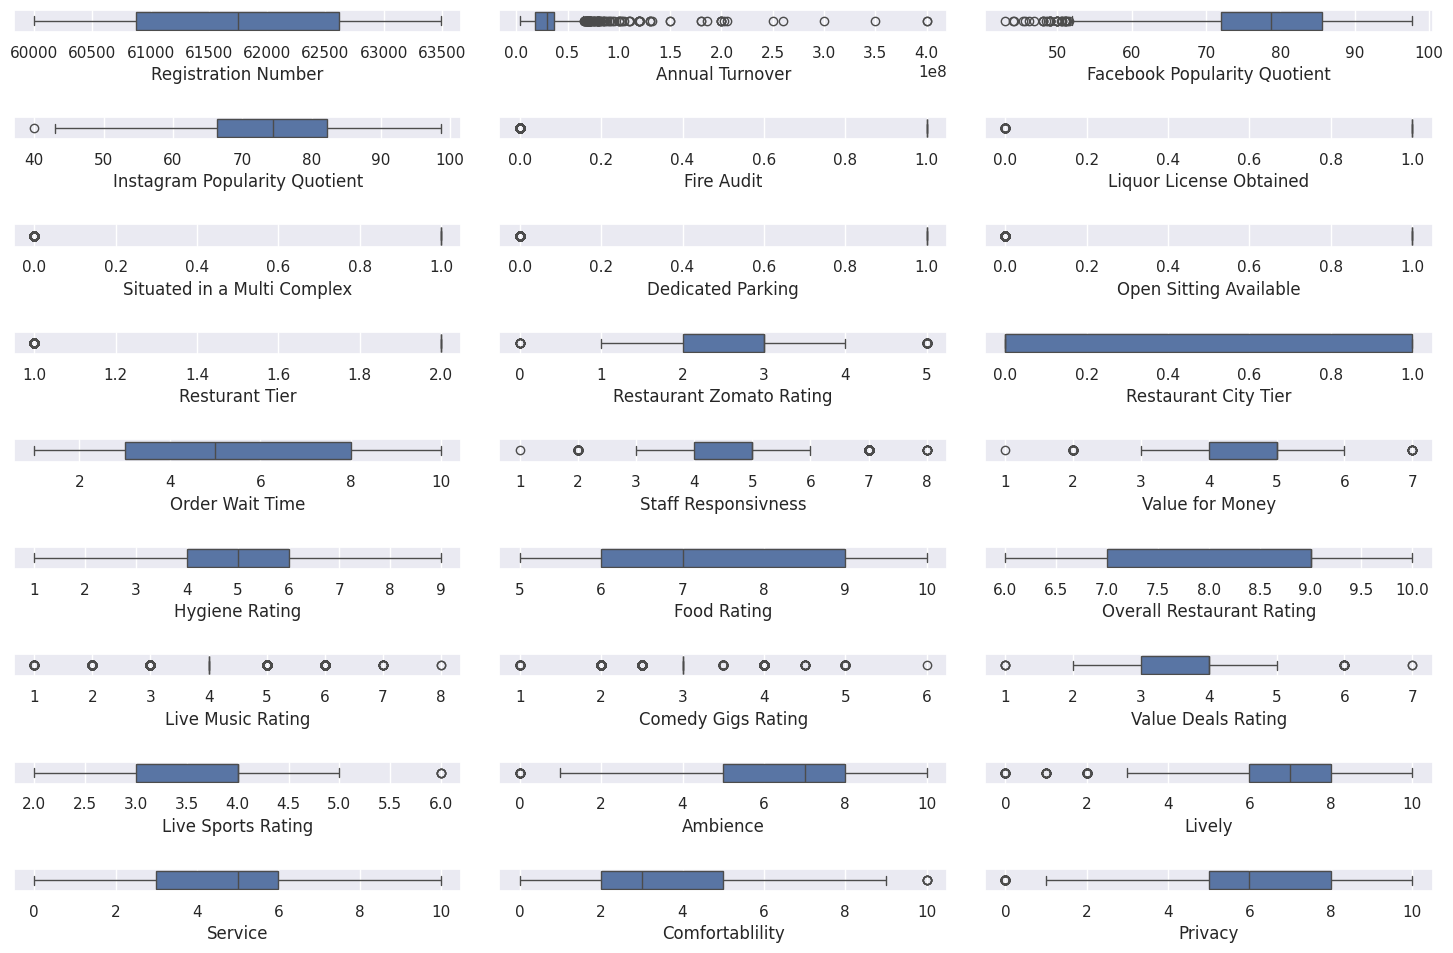

In [17]:
# outlier detection using boxplot
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns needed for the subplots
num_rows = int(np.ceil(len(num_cols) / 3))

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df_train, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [18]:
df_train.head()


,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,...,10.0,4.0,3.0,4.0,3.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,...,9.0,4.0,4.0,4.0,4.0,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,...,8.0,3.0,3.0,4.0,5.0,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,...,9.0,6.0,3.0,4.0,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,...,6.0,4.0,2.0,5.0,3.0,6.0,6,2,4,6


In [19]:
df_train.drop(["Restaurant Theme"], axis=1, inplace=True)
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,...,10.0,4.0,3.0,4.0,3.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,...,9.0,4.0,4.0,4.0,4.0,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,...,8.0,3.0,3.0,4.0,5.0,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,...,9.0,6.0,3.0,4.0,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,...,6.0,4.0,2.0,5.0,3.0,6.0,6,2,4,6


In [20]:
df_train.drop(["Live Sports Rating"], axis=1, inplace=True)
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,...,7,10.0,4.0,3.0,4.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,...,8,9.0,4.0,4.0,4.0,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,...,7,8.0,3.0,3.0,4.0,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,...,8,9.0,6.0,3.0,4.0,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,...,8,6.0,4.0,2.0,5.0,6.0,6,2,4,6


Dat Preparation for modeling

In [21]:
# defining X and y variables
X = df_train.drop(["Annual Turnover"], axis= 1)
y = df_train["Annual Turnover"]

print(X.head())
print(y.head())

   Registration Number           Cuisine       City Restaurant Location  \
0                60001      indian,irish  Bangalore   Near Business Hub   
1                60002      indian,irish     Indore      Near Party Hub   
2                60003   tibetan,italian    Chennai   Near Business Hub   
3                60004  turkish,nigerian    Gurgaon      Near Party Hub   
4                60005     irish,belgian    Manesar      Near Party Hub   

  Opening Day of Restaurant  Facebook Popularity Quotient       Endorsed By  \
0                14-02-2009                     84.300000      Not Specific   
1                29-09-2008                     85.400000  Tier A Celebrity   
2                30-07-2011                     85.000000  Tier A Celebrity   
3                30-11-2008                     85.600000  Tier A Celebrity   
4                22-02-2010                     77.938715  Tier A Celebrity   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...

In [22]:
# let's add the intercept to data
X = sm.add_constant(X)

In [23]:
X = pd.get_dummies(X, drop_first=True).astype(float)

In [24]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,const,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Opening Day of Restaurant_31-10-2011,Opening Day of Restaurant_31-12-2008,Opening Day of Restaurant_31-12-2009,Opening Day of Restaurant_31-12-2010,Opening Day of Restaurant_31-12-2012,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,1.0,60001.0,84.300000,95.8,1.0,1.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,60002.0,85.400000,85.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,60003.0,85.000000,68.2,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,60004.0,85.600000,83.6,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,60005.0,77.938715,76.8,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
X = X.astype(float)
X.head()

,const,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Opening Day of Restaurant_31-10-2011,Opening Day of Restaurant_31-12-2008,Opening Day of Restaurant_31-12-2009,Opening Day of Restaurant_31-12-2010,Opening Day of Restaurant_31-12-2012,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,1.0,60001.0,84.300000,95.8,1.0,1.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,60002.0,85.400000,85.0,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,60003.0,85.000000,68.2,1.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,60004.0,85.600000,83.6,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,60005.0,77.938715,76.8,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2445
Number of rows in test data = 1048


Model Building - Linear Regression

In [28]:
x_train

,const,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Opening Day of Restaurant_31-10-2011,Opening Day of Restaurant_31-12-2008,Opening Day of Restaurant_31-12-2009,Opening Day of Restaurant_31-12-2010,Opening Day of Restaurant_31-12-2012,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
221,1.0,60222.0,87.000000,72.00,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3274,1.0,63275.0,82.000000,75.00,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1329,1.0,61330.0,80.200000,69.80,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2681,1.0,62682.0,93.000000,94.60,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1156,1.0,61157.0,60.500000,72.15,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1.0,62764.0,85.000000,86.00,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
905,1.0,60906.0,83.100000,87.10,1.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1096,1.0,61097.0,78.000000,55.00,1.0,1.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
235,1.0,60236.0,77.938715,60.00,1.0,1.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Turnover   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1.379
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.31e-07
Time:                        09:06:11   Log-Likelihood:                -42757.
No. Observations:                2445   AIC:                         8.892e+04
Df Residuals:                     740   BIC:                         9.882e+04
Df Model:                        1704                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# Interpretation of the Regression Output

# R-squared:  Indicates the goodness of fit of the model.  A higher R-squared (closer to 1) suggests the model explains a larger proportion of the variance in the dependent variable ("Annual Turnover").  Look at the Adjusted R-squared, which penalizes the inclusion of irrelevant predictors.

# Adj. R-squared: A better measure than R-squared, especially when comparing models with different numbers of predictors.

# F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the regression model.  A low p-value (Prob (F-statistic) < 0.05) suggests that at least one predictor variable is statistically significant in explaining the variation in the dependent variable.


# Coefficients (coef):  These represent the change in the dependent variable ("Annual Turnover") for a one-unit change in the respective independent variable, holding all other variables constant.

# Standard Errors (std err):  Measures the accuracy of the coefficient estimates. Smaller standard errors indicate more precise estimates.

# t-statistic and P>|t|: The t-statistic tests the significance of each individual predictor variable.  A low p-value (P>|t| < 0.05) indicates that the predictor is statistically significant. Variables with high p-values might not be contributing significantly to the model and could be removed.

# Confidence Intervals [0.025 0.975]: The range within which the true population coefficient is likely to fall with 95% confidence.

# Omnibus, Durbin-Watson, Jarque-Bera, Cond. No.: These are diagnostic tests that help assess the validity of the regression assumptions (normality of residuals, independence of errors, homoscedasticity).  Interpreting these tests requires some statistical knowledge; consult statistical resources for a thorough understanding.


# Further Steps:
# 1. Check for multicollinearity:  High multicollinearity (correlation between predictor variables) can inflate standard errors and make it difficult to interpret the coefficients.  Use Variance Inflation Factor (VIF) to check for multicollinearity.
# 2. Remove insignificant variables: Remove variables with high p-values (P>|t| > 0.05) to simplify the model and improve its interpretability.  Re-run the regression after removing each variable.
# 3. Examine Residuals:  Check the distribution of residuals (the difference between the observed and predicted values) for normality and homoscedasticity. Plot residuals against predicted values and create a Q-Q plot to assess these assumptions.
# 4. Consider transformations: If the assumptions of linear regression are violated, consider transformations of the variables (e.g., logarithmic transformation) to improve the model fit.


# Note: The specific interpretation will heavily rely on the context of the data and business objectives.


In [30]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [31]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,9.517823e+06,4.167318e+06,0.760562,-0.828704,17.114994


In [32]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.152458e+07,2.093421e+07,-0.467992,2.4271,92.770446


In [33]:
## Importing Simple Imputer to treat the null values
from sklearn.impute import SimpleImputer

## Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation
SI = SimpleImputer(strategy='mean')

# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

## Declaring the Linear Regression function
LR = LinearRegression()

# Assign the 'Instagram Popularity Quotient' column to the variable IPQ
IPQ = df_train[['Instagram Popularity Quotient']]

# Impute missing values in IPQ using SimpleImputer
IPQ = SI.fit_transform(IPQ) # This line is added to fill missing values in IPQ

## Fitting the Linear Regression function
model = LR.fit(IPQ,df_train['Annual Turnover'])

## Checking the score of the function on the training data
model.score(IPQ,df_train['Annual Turnover'])

0.026482712263984687

In [35]:
df_train.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


# Loading the Test Data and using the Test Data to Predict the target Variable

In [34]:
test = pd.read_csv('/content/Test_dataset.csv')
df_test = test.copy()
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [35]:
## Checking for the null values

df_test.isnull().sum()

,0
Registration Number,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0


In [36]:
df_test['Facebook Popularity Quotient'].mean()

77.54123999999999

In [37]:
## Using the model built on the Training set to predict on the Test Set

prediction = model.predict(df_test[['Instagram Popularity Quotient']])
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([28970960.71768262, 37737095.60304943, 34490378.9788395 ,
       30724187.69475599, 34639727.94355316, 25759957.976339  ,
       23906082.78391513, 27347602.40557766, 31243662.35462957,
       27448250.62092816, 30399516.03233499, 33711166.98902912,
       35139722.30368149, 31081326.52341907, 29078102.36628155,
       27724221.53398601, 33776101.32151332, 27867077.06545124,
       34165707.31641851, 28191748.72787224, 28646289.05526163,
       33516363.99157652, 27996945.73041964, 27996945.73041964,
       31935212.99558628, 26308653.08583048, 36373474.62088126,
       35139722.30368149, 32996889.33170294, 35789065.62852347,
       27120332.24188296, 31243662.35462957, 36146204.45718656,
       36535810.45209175, 31243662.35462957, 22802199.13168375,
       32542349.00431354, 29490435.37755621, 28743690.55398792,
       24360623.11130452, 36730613.44954436, 27802142.73296705,
       29321606.11309729, 27802142.73296705, 35983868.62597607,
       31568334.01705056, 27672274.06799

In [40]:
# Fill missing values in 'Value Deals Rating' with the mean
df_test['Value Deals Rating'].fillna(df_test['Value Deals Rating'].mean(), inplace=True)

<ipython-input-40-0bf4fc79a01c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Value Deals Rating'].fillna(df_test['Value Deals Rating'].mean(), inplace=True)


In [38]:
df_test["Overall Restaurant Rating"] = df_test["Overall Restaurant Rating"].fillna(
    value=df_test.groupby(["Hygiene Rating", "Food Rating"])["Overall Restaurant Rating"].transform("median")
)
df_test["Live Music Rating"] = df_test["Live Music Rating"].fillna(
    value=df_test.groupby(["Lively", "Open Sitting Available"])["Live Music Rating"].transform("median")
)

df_test["Comedy Gigs Rating"] = df_test["Comedy Gigs Rating"].fillna(
    value=df_test.groupby(["Open Sitting Available", "Lively","Ambience"])["Comedy Gigs Rating"].transform("median")
)

df_test["Live Sports Rating"] = df_test["Live Sports Rating"].fillna(
    value=df_test.groupby(["Lively","Live Music Rating"])["Live Sports Rating"].transform("median")
)

df_test["Comedy Gigs Rating"] = df_test["Comedy Gigs Rating"].fillna(
    value=df_test.groupby(["Open Sitting Available", "Value for Money"])["Comedy Gigs Rating"].transform("median")
)
df_test["Live Sports Rating"] = df_test["Live Sports Rating"].fillna(
    value=df_test.groupby(["Value for Money","Live Music Rating"])["Live Sports Rating"].transform("median")
)

In [49]:
df_test["Value Deals Rating"] = df_test["Value Deals Rating"].fillna(
    value=df_test.groupby(["Value for Money", "Staff Responsivness"])["Value Deals Rating"].transform("median")
)


In [53]:
df_test["Overall Restaurant Rating"] = df_test["Overall Restaurant Rating"].fillna(
    value=df_test.groupby(["Comfortablility", "Open Sitting Available"])["Overall Restaurant Rating"].transform("median")
)
df_test["Live Music Rating"] = df_test["Live Music Rating"].fillna(
    value=df_test.groupby(["Ambience", "Open Sitting Available"])["Live Music Rating"].transform("median")
)

df_test["Comedy Gigs Rating"] = df_test["Comedy Gigs Rating"].fillna(
    value=df_test.groupby(["Open Sitting Available", "Lively"])["Comedy Gigs Rating"].transform("median")
)

df_test["Value Deals Rating"] = df_test["Value Deals Rating"].fillna(
    value=df_test.groupby(["Value for Money", "Privacy"])["Value Deals Rating"].transform("median")
)

df_test["Value Deals Rating"] = df_test["Value Deals Rating"].fillna(
    value=df_test.groupby(["Ambience", "Privacy"])["Value Deals Rating"].transform("median")
)


In [54]:
df_test.isnull().sum()

,0
Registration Number,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0


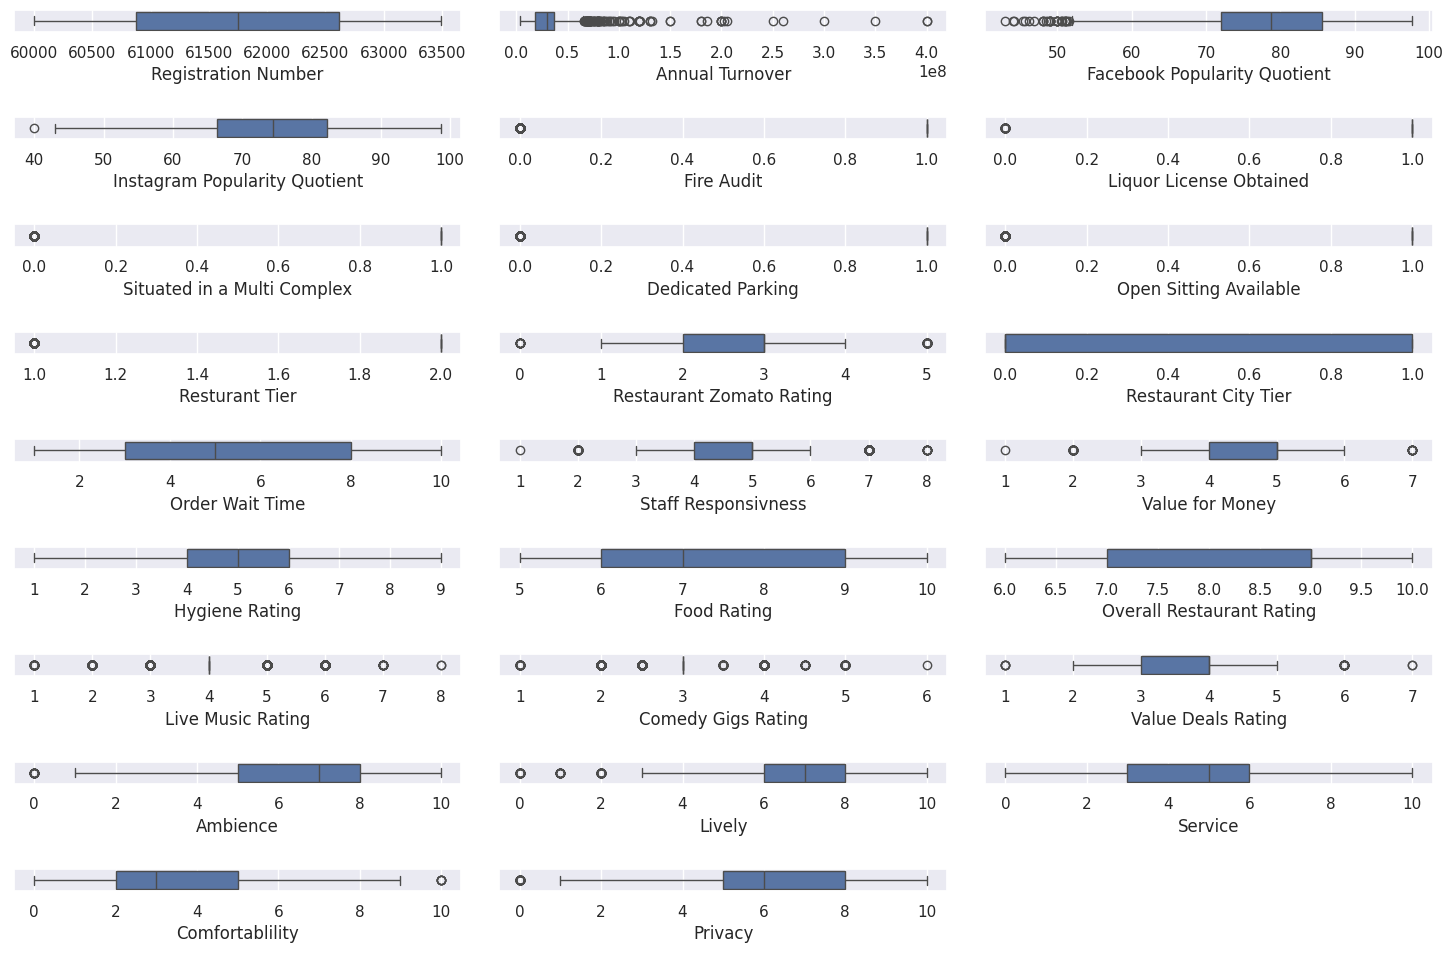

In [55]:
# outlier detection using boxplot
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns needed for the subplots
num_rows = int(np.ceil(len(num_cols) / 3))

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df_train, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [41]:
df_test.drop(["Restaurant Theme"], axis=1, inplace=True)
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,3.5,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,3.0,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,3.5,NaN,3.5,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,3.0,NaN,4.0,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,9.5,4.0,3.0,NaN,3.0,4,4,7,7,3


In [42]:
df_test.drop(["Live Sports Rating"], axis=1, inplace=True)
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,8,6.0,3.5,2.0,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,8,9.0,3.0,3.0,NaN,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,9,6.0,3.0,3.5,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9,9.0,6.0,3.0,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,8,9.5,4.0,3.0,NaN,4,4,7,7,3


Dat Preparation for modeling

In [56]:
# defining X and y variables
X = df_test.drop(["Registration Number"], axis= 1)
y = df_test["Registration Number"]

print(X.head())
print(y.head())

            Cuisine       City Restaurant Location Opening Day of Restaurant  \
0   tibetan,italian  Bangalore   Near Business Hub                13-07-2010   
1   tibetan,italian  Hyderabad      Near Party Hub                05-09-2011   
2  algerian,belgian  Hyderabad      Near Party Hub                12-04-2011   
3     tibetan,greek         -1      Near Party Hub                16-01-2005   
4     cuban,british      Pune       Near Party Hub                10-11-2008   

   Facebook Popularity Quotient      Endoresed By  \
0                         78.00  Tier A Celebrity   
1                         89.17      Not Specific   
2                         84.00      Not Specific   
3                         79.38      Not Specific   
4                         84.67      Not Specific   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                          69.00           1                        1   
1                          96.00           1          

In [57]:
# let's add the intercept to data
X = sm.add_constant(X)

In [58]:
X = pd.get_dummies(X, drop_first=True).astype(float)

In [59]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,const,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Opening Day of Restaurant_31-10-2008,Opening Day of Restaurant_31-10-2010,Opening Day of Restaurant_31-12-2006,Opening Day of Restaurant_31-12-2007,Opening Day of Restaurant_31-12-2008,Endoresed By_Not Specific,Endoresed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,1.0,78.00,69.00,1.0,1.0,1.0,1.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,89.17,96.00,1.0,1.0,1.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,84.00,86.00,1.0,1.0,1.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,79.38,74.40,0.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,84.67,86.46,1.0,1.0,1.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Opening Day of Restaurant_31-10-2008,Opening Day of Restaurant_31-10-2010,Opening Day of Restaurant_31-12-2006,Opening Day of Restaurant_31-12-2007,Opening Day of Restaurant_31-12-2008,Endoresed By_Not Specific,Endoresed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,1.0,78.00,69.00,1.0,1.0,1.0,1.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,89.17,96.00,1.0,1.0,1.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,84.00,86.00,1.0,1.0,1.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,79.38,74.40,0.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,84.67,86.46,1.0,1.0,1.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 350
Number of rows in test data = 150


Model Building - Linear Regression

In [62]:
x_test

,const,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Opening Day of Restaurant_31-10-2008,Opening Day of Restaurant_31-10-2010,Opening Day of Restaurant_31-12-2006,Opening Day of Restaurant_31-12-2007,Opening Day of Restaurant_31-12-2008,Endoresed By_Not Specific,Endoresed By_Tier A Celebrity,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
304,1.0,70.80,64.00,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
340,1.0,94.40,87.00,1.0,1.0,1.0,0.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47,1.0,77.92,83.60,1.0,1.0,1.0,1.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,1.0,64.00,61.00,1.0,1.0,0.0,0.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
479,1.0,88.30,83.50,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1.0,87.20,87.14,0.0,1.0,1.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,80.00,60.00,1.0,1.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
95,1.0,81.20,76.30,0.0,1.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
122,1.0,84.40,79.40,1.0,1.0,1.0,1.0,1.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
df_test.isnull().sum()

,0
Registration Number,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endoresed By,0
Instagram Popularity Quotient,0
Fire Audit,0
Liquor License Obtained,0


In [64]:
olsmodel = sm.OLS(y_test, x_test).fit()
print(olsmodel.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


                             OLS Regression Results                            
Dep. Variable:     Registration Number   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Mon, 03 Feb 2025   Prob (F-statistic):                nan
Time:                         09:25:06   Log-Likelihood:                 3195.0
No. Observations:                  150   AIC:                            -6090.
Df Residuals:                        0   BIC:                            -5638.
Df Model:                          149                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


Model Performance Check

Let's check the performance of the model using different metrics.

    We will be using metric functions defined in sklearn for RMSE, MAE, and R2

.

We will define a function to calculate MAPE and adjusted R2

.

    The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

We will create a function which will print out all the above metrics in one go.


In [65]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [66]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,966.441116,748.46608,-44.307962,68.864715,3.698099


In [67]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.359618e-10,1.164638e-10,1.0,1.0,5.747513e-13


# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [69]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [70]:
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,2.897096e+07
1,20002,3.773710e+07
2,20003,3.449038e+07
3,20004,3.072419e+07
4,20005,3.463973e+07
...,...,...
495,20496,2.994498e+07
496,20497,2.395478e+07
497,20498,2.975017e+07
498,20499,3.770463e+07


In [71]:
# prompt: setting the path in the google colab to export the file as .csv

# Save the DataFrame to a CSV file in the specified path
solution_df.to_csv('/content/Submission.csv', index=False)

# Download the file
from google.colab import files
files.download('/content/Submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# prompt: exporting the contens to  .csv in google colab upload file

# Assuming 'solution_df' is already created as in your provided code.
solution_df.to_csv('predicted_annual_turnover.csv', index=False)


In [73]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission.csv',index=False)

# END